In [1]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 

from xibs.analytical import NagaitsevIBS,BjorkenMtingwaIBS
from xibs.inputs import BeamParameters, OpticsParameters

/home/pkruyt/cernbox/xsuite-laser/xtrack/xtrack/progress_indicator.py:90: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# import sys
# sys.path.append('/home/pkruyt/cernbox/CERN-coolers/LEIR/ions')

# from ion_properties import ions, IonProperties

In [3]:
# context = xo.ContextCpu(omp_num_threads=4)
context = xo.ContextCpu()

line = xt.Line.from_json('sps.json')
particle_ref0=line.particle_ref
line.build_tracker()

clight=constants.speed_of_light
circumference = line.get_length()

Loading line from dict:   0%|          | 0/38786 [00:00<?, ?it/s]

Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [4]:
from ion_properties import ions,lead,calcium,xenon



Loop over both sig_delta and emittance

In [5]:
sig_delta_list = np.linspace(1e-5, 1e-4, 50)
n_emitt_list=np.linspace(1.5e-7,1.5e-6,50)
sigma_z = 0.063 #https://cds.cern.ch/record/2690736/files/SPSC-I-253.pdf

# beta0=particle_ref0.beta0
# gamma0=particle_ref0.gamma0

growth_rates_2d_x = np.zeros((len(sig_delta_list), len(n_emitt_list)))
growth_rates_2d_y = np.zeros((len(sig_delta_list), len(n_emitt_list)))
growth_rates_2d_z = np.zeros((len(sig_delta_list), len(n_emitt_list)))


for ion_loop in tqdm((ions)):
    line.discard_tracker()
    q0 = ion_loop.q0
    mass0 = ion_loop.mass0
    gamma0 = ion_loop.gamma_rel
    beta0 = ion_loop.beta_rel
    # gamma = particle_ref.gamma0
    # beta= particle_ref.beta0
    p0c = mass0*gamma0*beta0 #eV/c
    bunch_intensity = ion_loop.Intensity
    particle_ref = xp.Particles(p0c=p0c, mass0=mass0, q0=q0)

    line.particle_ref=particle_ref
    line.build_tracker()
    twiss = line.twiss()
    
    for j, n_emitt_loop in tqdm(enumerate(n_emitt_list)):
        geom_epsx = n_emitt_loop/(beta0*gamma0)
        geom_epsy = n_emitt_loop/(beta0*gamma0)
        
        for k, sig_delta_loop in enumerate(sig_delta_list):
            beam_params = BeamParameters.from_line(line, n_part=bunch_intensity)
            optics = OpticsParameters(twiss)
            IBS = BjorkenMtingwaIBS(beam_params, optics)
            
            growth_rates = IBS.growth_rates(geom_epsx, geom_epsy, sig_delta_loop, sigma_z,bunched=True)

            growth_rates_2d_x[k, j] = growth_rates.Tx
            growth_rates_2d_y[k, j] = growth_rates.Ty
            growth_rates_2d_z[k, j] = growth_rates.Tz

    np.savez(f'IBS_results_bunched/{ion_loop.name}.npz',
            growth_rates_2d_x=growth_rates_2d_x,
            growth_rates_2d_y=growth_rates_2d_y,
            growth_rates_2d_z=growth_rates_2d_z,
            sig_delta_list=sig_delta_list,
            n_emitt_list=n_emitt_list,
            total_intensity=bunch_intensity)

  0%|          | 0/3 [00:00<?, ?it/s]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MA

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MA

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MA

Example of Growth rates as a function of RMS dp/p

In [6]:
sig_delta_list = np.linspace(1e-4, 1e-5, 50)

growth_rates_2d_x = np.zeros((len(sig_delta_list), 1))
growth_rates_2d_y = np.zeros((len(sig_delta_list), 1))
growth_rates_2d_z = np.zeros((len(sig_delta_list), 1))

ion_example=xenon

line.discard_tracker()
q0 = ion_example.q0
mass0 = ion_example.mass0
beta0 = ion_example.beta_rel
gamma0 = ion_example.gamma_rel
# gamma = particle_ref.gamma0
# beta= particle_ref.beta0
p0c = mass0*gamma0*beta0 #eV/c
bunch_intensity = ion_example.Intensity
particle_ref = xp.Particles(p0c=p0c, mass0=mass0, q0=q0)

line.particle_ref=particle_ref
line.build_tracker()
twiss = line.twiss()

geom_epsx = 1.5e-6/(beta0*gamma0)
geom_epsy = 1.5e-6/(beta0*gamma0)

for k, sig_delta_loop in enumerate(sig_delta_list):
    beam_params = BeamParameters.from_line(line, n_part=bunch_intensity)
    optics = OpticsParameters(twiss)
    IBS = BjorkenMtingwaIBS(beam_params, optics)
    
    growth_rates = IBS.growth_rates(geom_epsx, geom_epsy, sig_delta_loop, sigma_z,bunched=True)

    growth_rates_2d_x[k, 0] = growth_rates.Tx
    growth_rates_2d_y[k, 0] = growth_rates.Ty
    growth_rates_2d_z[k, 0] = growth_rates.Tz

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MA

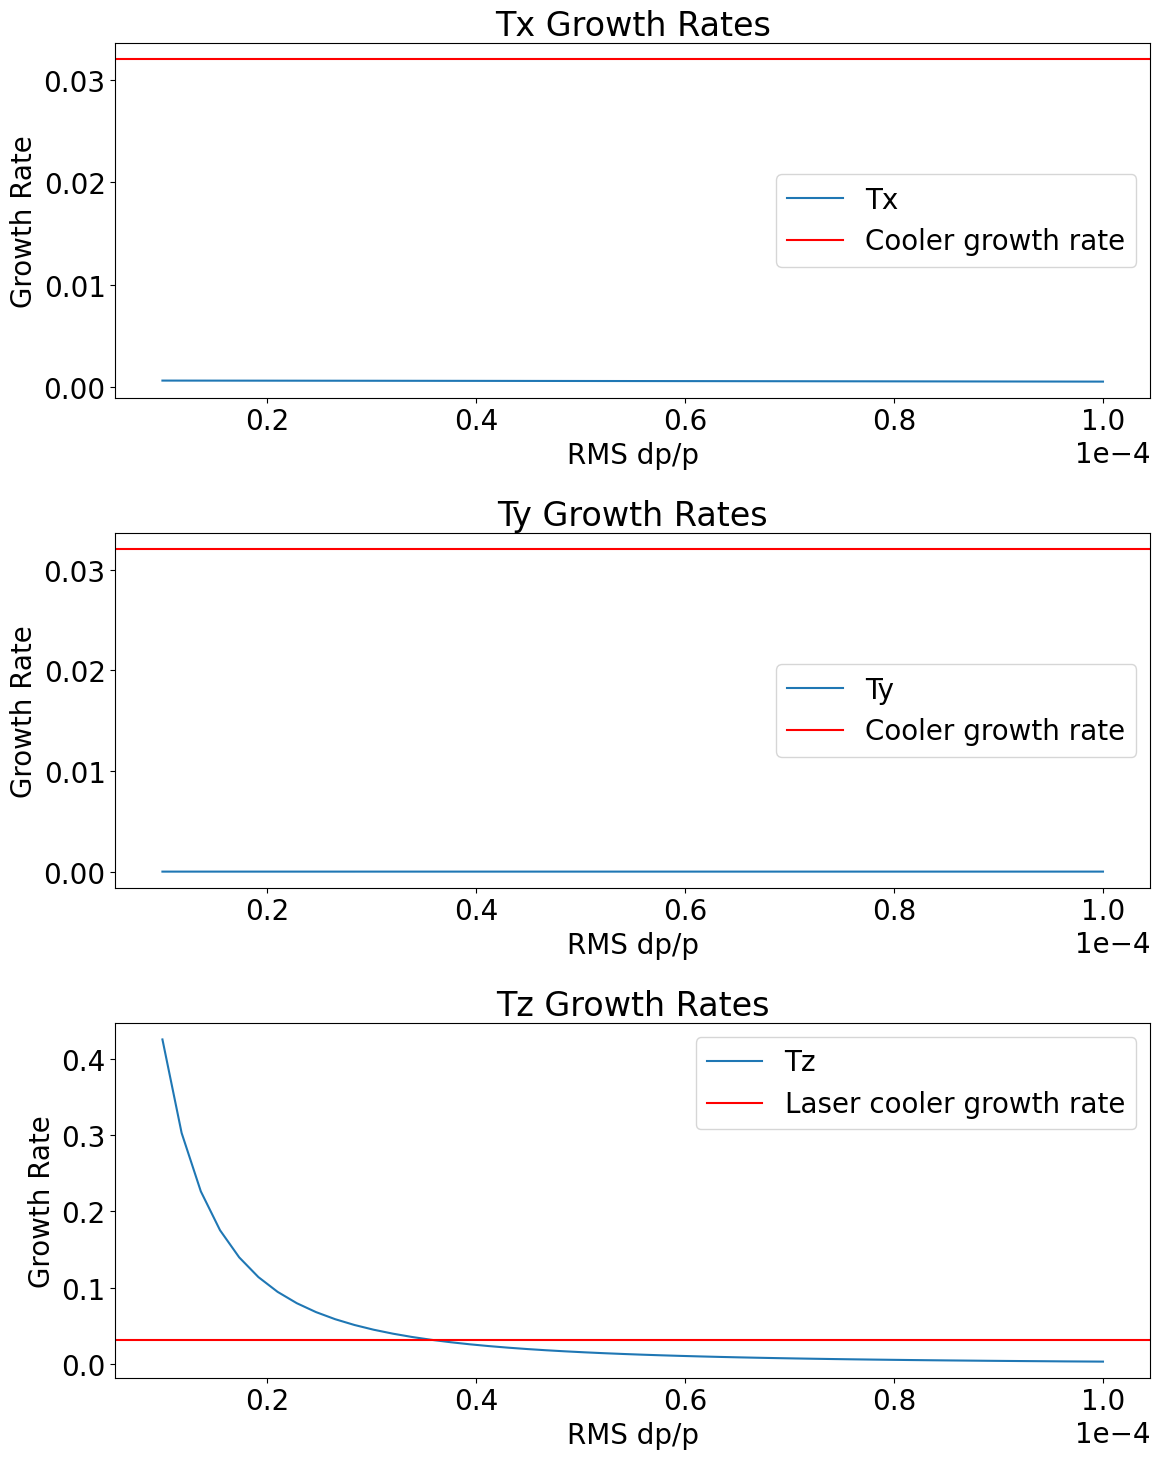

In [7]:
growth_rates_list=[-0.014543483928087665, -0.03199828107563238, -0.2150191845385947]

growth_rate_xenon=-0.03199828107563238


plt.figure(figsize=(12, 15))
plt.rcParams.update({'font.size': 20})


plt.subplot(3, 1, 1)
plt.plot(sig_delta_list, growth_rates_2d_x[:, 0], label='Tx')
plt.title('Tx Growth Rates')
plt.xlabel('RMS dp/p')
plt.ylabel('Growth Rate')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.axhline(-growth_rate_xenon,color='red',label='Cooler growth rate')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(sig_delta_list, growth_rates_2d_y[:, 0], label='Ty')
plt.title('Ty Growth Rates')
plt.xlabel('RMS dp/p')
plt.ylabel('Growth Rate')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.axhline(-growth_rate_xenon,color='red',label='Cooler growth rate')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(sig_delta_list, growth_rates_2d_z[:, 0], label='Tz')
plt.title('Tz Growth Rates')
plt.xlabel('RMS dp/p')
plt.ylabel('Growth Rate')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.axhline(-growth_rate_xenon,color='red',label='Laser cooler growth rate')
plt.legend()

plt.tight_layout()
plt.show()